In [144]:
import pandas as pd

In [145]:
Netflix_Data = pd.read_csv('titles.csv')

In [146]:
Netflix_Data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


# Estructura del data-set

This dataset contains +5k unique titles on Netflix with 15 columns containing their information, including:

id: The title ID on JustWatch.
title: The name of the title.
show_type: TV show or movie.
description: A brief description.
release_year: The release year.
age_certification: The age certification.
runtime: The length of the episode (SHOW) or movie.
genres: A list of genres.
production_countries: A list of countries that produced the title.
seasons: Number of seasons if it's a SHOW.
imdb_id: The title ID on IMDB.
imdb_score: Score on IMDB.
imdb_votes: Votes on IMDB.
tmdb_popularity: Popularity on TMDB.
tmdb_score: Score on TMDB.

In [147]:
Netflix_Data.shape

(5850, 15)

In [148]:
Netflix_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [149]:
Netflix_Data['type'].unique()

array(['SHOW', 'MOVIE'], dtype=object)

In [150]:
Netflix_Data['genres'].unique()

array(["['documentation']", "['drama', 'crime']",
       "['drama', 'action', 'thriller', 'european']", ...,
       "['drama', 'animation', 'music']",
       "['animation', 'family', 'scifi']",
       "['documentation', 'music', 'reality']"], dtype=object)

In [151]:
Netflix_Data['age_certification'].unique()

array(['TV-MA', 'R', 'PG', nan, 'TV-14', 'PG-13', 'TV-PG', 'TV-Y', 'TV-G',
       'TV-Y7', 'G', 'NC-17'], dtype=object)

In [152]:
Netflix_Data['production_countries'].unique()

array(["['US']", "['GB']", "['GB', 'US']", "['EG']", "['DE']", "['IN']",
       "['SU', 'IN']", "['LB', 'CA', 'FR']", '[]', "['LB']",
       "['DZ', 'EG']", "['CA', 'FR', 'LB']", "['US', 'GB']",
       "['US', 'IT']", "['JP']", "['AR']", "['FR', 'EG']", "['FR', 'LB']",
       "['CA', 'US']", "['US', 'FR']", "['JP', 'US']", "['US', 'CA']",
       "['DE', 'US']", "['PE', 'US', 'BR']", "['IT', 'US', 'FR']",
       "['IE', 'GB', 'DE', 'FR']", "['HK', 'US']", "['AU']", "['FR']",
       "['DE', 'GH', 'GB', 'US', 'BF']", "['MX']", "['ES', 'AR']",
       "['CO']", "['PS', 'US', 'FR', 'DE']", "['FR', 'NO', 'LB', 'BE']",
       "['BE', 'FR', 'IT', 'LB']", "['TR']", "['IN', 'SU']", "['DK']",
       "['CA']", "['DE', 'GB', 'US', 'BS', 'CZ']", "['MT', 'GB', 'US']",
       "['AU', 'DE', 'GB', 'US']", "['US', 'JP']", "['BE', 'US']",
       "['HK']", "['IT']", "['US', 'FR', 'DE', 'GB']",
       "['GB', 'US', 'FR', 'DE']", "['IT', 'US']", "['US', 'ZA']",
       "['GB', 'ES']", "['GB', 'US', 'JP']", "['

In [153]:
Netflix_Data.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [154]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

In [155]:
Netflix_Data['type'] = ord_enc.fit_transform(Netflix_Data[['type']])


# Resumen Estadístico Descriptivo Básico <a class="anchor" id="9"></a>

In [156]:
Netflix_Data.describe(include='all') # include='all' para dar un tratamiento diferente a las categoricas que a las cuantitativas

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850,5849,5850.000000,5832,5850.000000,3231,5850.000000,5850,5850,2106.000000,5447,5368.000000,5.352000e+03,5759.000000,5539.000000
unique,5850,5798,NaN,5829,NaN,11,NaN,1726,452,NaN,5447,NaN,NaN,NaN,NaN
top,ts300399,The Gift,NaN,Five families struggle with the ups and downs ...,NaN,TV-MA,NaN,['comedy'],['US'],NaN,tt0075314,NaN,NaN,NaN,NaN
freq,1,3,NaN,2,NaN,883,NaN,484,1959,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.360000,NaN,2016.417094,NaN,76.888889,NaN,NaN,2.162868,NaN,6.510861,2.343938e+04,22.637925,6.829175
std,NaN,NaN,0.480041,NaN,6.937726,NaN,39.002509,NaN,NaN,2.689041,NaN,1.163826,9.582047e+04,81.680263,1.170391
min,NaN,NaN,0.000000,NaN,1945.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,1.500000,5.000000e+00,0.009442,0.500000
25%,NaN,NaN,0.000000,NaN,2016.000000,NaN,44.000000,NaN,NaN,1.000000,NaN,5.800000,5.167500e+02,2.728500,6.100000
50%,NaN,NaN,0.000000,NaN,2018.000000,NaN,83.000000,NaN,NaN,1.000000,NaN,6.600000,2.233500e+03,6.821000,6.900000
75%,NaN,NaN,1.000000,NaN,2020.000000,NaN,104.000000,NaN,NaN,2.000000,NaN,7.300000,9.494000e+03,16.590000,7.537500


### 4.3.3. Análisis gráfico general <a class="anchor" id="10"></a>

#### 4.3.3.1. Histogramas para las variables cuantitativas <a class="anchor" id="11"></a>

In [157]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

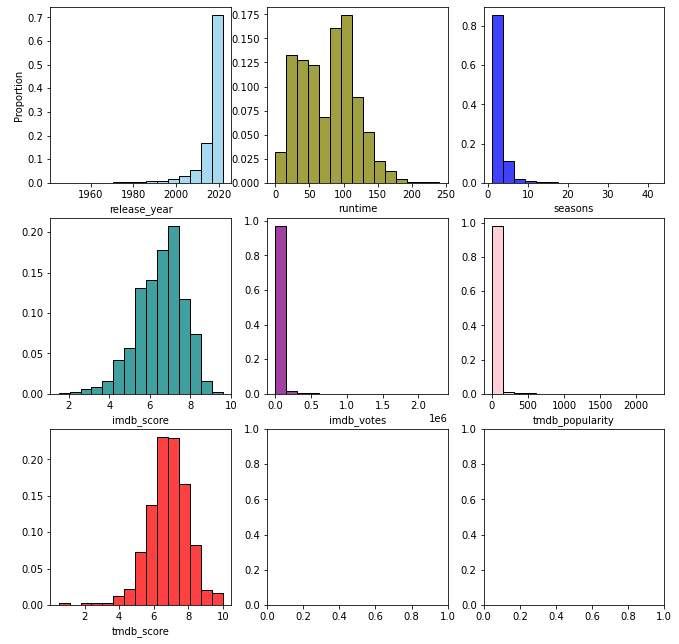

In [220]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.histplot(data=Netflix_Data, x="release_year", stat="proportion", bins=15, color="skyblue", ax=axs[0, 0])
 

p2 = sns.histplot(data=Netflix_Data, x="runtime", stat="proportion", bins=15, color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')
 

p3 = sns.histplot(data=Netflix_Data, x="seasons", stat="proportion", bins=15, color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')
 

p4 = sns.histplot(data=Netflix_Data, x="imdb_score", stat="proportion", bins=15, color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')
 

p5 = sns.histplot(data=Netflix_Data, x="imdb_votes", stat="proportion", bins=15, color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')
 

p6 = sns.histplot(data=Netflix_Data, x="tmdb_popularity", stat="proportion", bins=15, color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')
 
 
p7 = sns.histplot(data=Netflix_Data, x="tmdb_score", stat="proportion", bins=15, color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
 

plt.show()

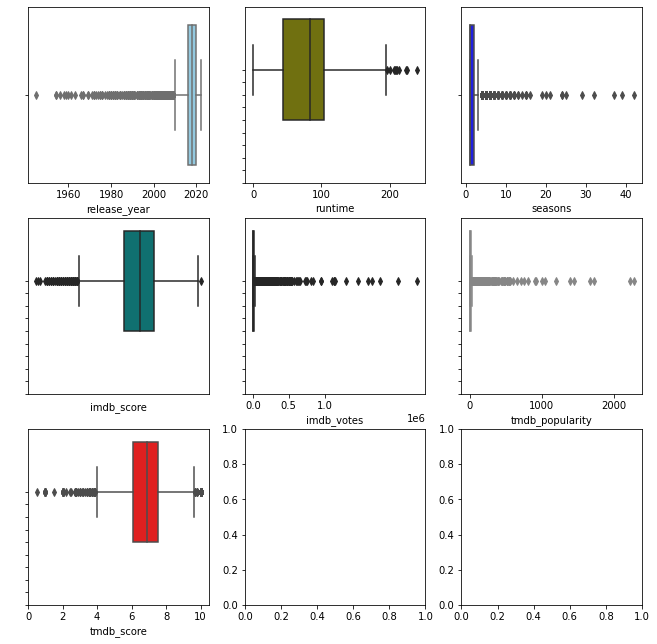

In [221]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.boxplot(data=Netflix_Data, x="release_year", color="skyblue", ax=axs[0, 0])
 

p2 = sns.boxplot(data=Netflix_Data, x="runtime",  color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')
p2.set_xticks( range(int(Netflix_Data['runtime'].min()) , int(Netflix_Data['runtime'].max()) , 100) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

p3 = sns.boxplot(data=Netflix_Data, x="seasons", color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')
 

p4 = sns.boxplot(data=Netflix_Data, x="imdb_score", color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')
p4.set_xticks( range(int(Netflix_Data['imdb_score'].min()) , int(Netflix_Data['imdb_score'].max()) , 300) )
p4.set_yticks( np.arange(0, 1, 0.1)  )

p5 = sns.boxplot(data=Netflix_Data, x="imdb_votes", color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')
p5.set_xticks( range(int(Netflix_Data['imdb_votes'].min()) , int(Netflix_Data['imdb_votes'].max()/2) , 500000) )
p5.set_yticks( np.arange(0, 1, 0.1)  )

p6 = sns.boxplot(data=Netflix_Data, x="tmdb_popularity", color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')
p6.set_xticks( range(int(Netflix_Data['tmdb_popularity'].min()) , int(Netflix_Data['tmdb_popularity'].max()+1) , 1000) )
p6.set_yticks( np.arange(0, 1, 0.1)  )
 
p7 = sns.boxplot(data=Netflix_Data, x="tmdb_score", color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
p7.set_xticks( range(int(Netflix_Data['tmdb_score'].min()) , int(Netflix_Data['tmdb_score'].max()+1) , 2) )
p7.set_yticks( np.arange(0, 1, 0.1)  )

plt.show()

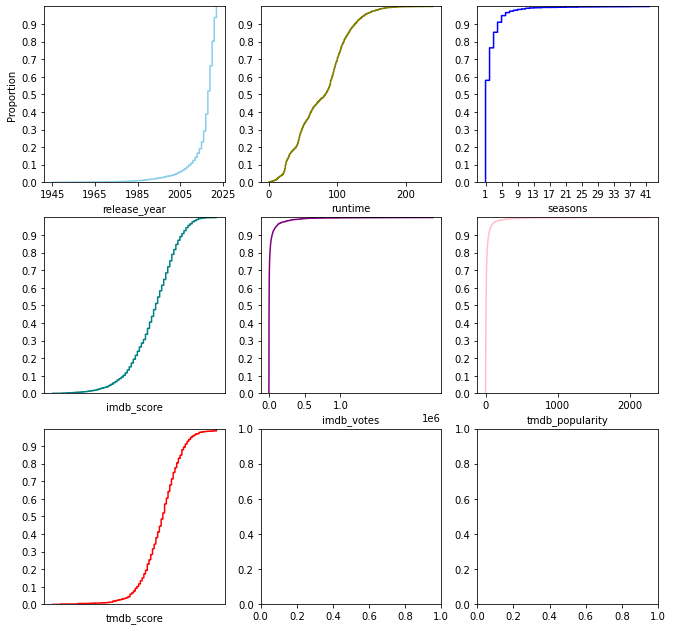

In [160]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.ecdfplot(data=Netflix_Data, x="release_year", color="skyblue", ax=axs[0, 0])
p1.set_xticks( range(int(Netflix_Data['release_year'].min()) , int(Netflix_Data['release_year'].max()+20) , 20) )
p1.set_yticks( np.arange(0, 1, 0.1)  )

p2 = sns.ecdfplot(data=Netflix_Data, x="runtime",  color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')
p2.set_xticks( range(int(Netflix_Data['runtime'].min()) , int(Netflix_Data['runtime'].max()) , 100) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

p3 = sns.ecdfplot(data=Netflix_Data, x="seasons", color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')
p3.set_xticks( range(int(Netflix_Data['seasons'].min()) , int(Netflix_Data['seasons'].max()) , 4) )
p3.set_yticks( np.arange(0, 1, 0.1)  )

p4 = sns.ecdfplot(data=Netflix_Data, x="imdb_score", color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')
p4.set_xticks( range(int(Netflix_Data['imdb_score'].min()) , int(Netflix_Data['imdb_score'].max()) , 300) )
p4.set_yticks( np.arange(0, 1, 0.1)  )

p5 = sns.ecdfplot(data=Netflix_Data, x="imdb_votes", color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')
p5.set_xticks( range(int(Netflix_Data['imdb_votes'].min()) , int(Netflix_Data['imdb_votes'].max()/2) , 500000) )
p5.set_yticks( np.arange(0, 1, 0.1)  )

p6 = sns.ecdfplot(data=Netflix_Data, x="tmdb_popularity", color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')
p6.set_xticks( range(int(Netflix_Data['tmdb_popularity'].min()) , int(Netflix_Data['tmdb_popularity'].max()+1) , 1000) )
p6.set_yticks( np.arange(0, 1, 0.1)  )
 
p7 = sns.ecdfplot(data=Netflix_Data, x="tmdb_score", color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
p7.set_xticks( range(int(Netflix_Data['tmdb_score'].min()) , int(Netflix_Data['tmdb_score'].max()+1) , 50) )
p7.set_yticks( np.arange(0, 1, 0.1)  )

plt.show()

## Analisis con  variables cuantitativas recortadas (trimmed)

In [212]:
def Trimmed_Outliers(df, variable_name):

    Q1 = df[variable_name].quantile(q=0.25)
    Q3 = df[variable_name].quantile(q=0.75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5*IQR

    lower_bound = Q1 - 1.5*IQR

    variable_trimmed = df.loc[ ( df[variable_name] >= lower_bound ) &  ( df[variable_name] <= upper_bound ) , variable_name ]

    return(variable_trimmed)

seasons , imdb_votes, tmdb_popularity

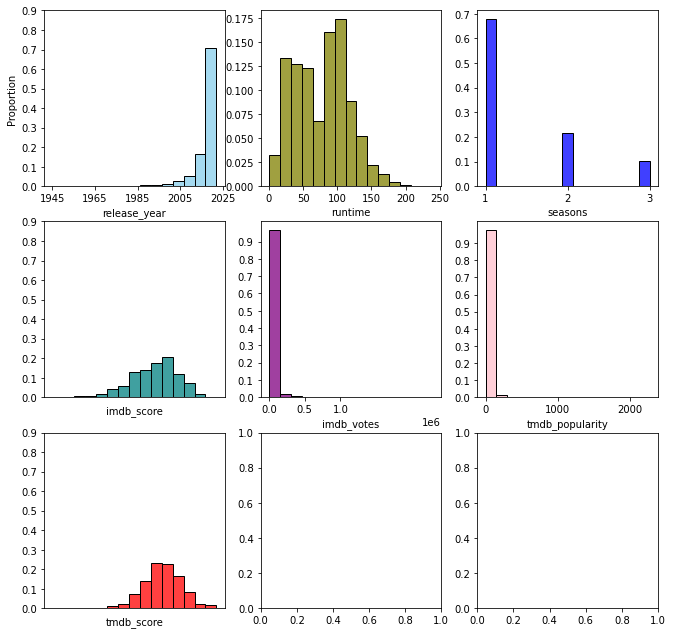

In [222]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.histplot(data=Netflix_Data, x="release_year", stat="proportion", bins=15, color="skyblue", ax=axs[0, 0])
p1.set_xticks( range(int(Netflix_Data['release_year'].min()) , int(Netflix_Data['release_year'].max()+20) , 20) )
p1.set_yticks( np.arange(0, 1, 0.1)  )

p2 = sns.histplot(data=Netflix_Data, x="runtime", stat="proportion", bins=15, color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')


p3 = sns.histplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'seasons')), x="seasons", stat="proportion", bins=15, color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')
p3.set_xticks( [1,2,3] )


p4 = sns.histplot(data=Netflix_Data, x="imdb_score", stat="proportion", bins=15, color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')
p4.set_xticks( range(int(Netflix_Data['imdb_score'].min()) , int(Netflix_Data['imdb_score'].max()) , 300) )
p4.set_yticks( np.arange(0, 1, 0.1)  )

p5 = sns.histplot(data=Netflix_Data, x="imdb_votes", stat="proportion", bins=15, color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')
p5.set_xticks( range(int(Netflix_Data['imdb_votes'].min()) , int(Netflix_Data['imdb_votes'].max()/2) , 500000) )
p5.set_yticks( np.arange(0, 1, 0.1)  )

p6 = sns.histplot(data=Netflix_Data, x="tmdb_popularity", stat="proportion", bins=15, color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')
p6.set_xticks( range(int(Netflix_Data['tmdb_popularity'].min()) , int(Netflix_Data['tmdb_popularity'].max()+1) , 1000) )
p6.set_yticks( np.arange(0, 1, 0.1)  )
 
p7 = sns.histplot(data=Netflix_Data, x="tmdb_score", stat="proportion", bins=15, color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
p7.set_xticks( range(int(Netflix_Data['tmdb_score'].min()) , int(Netflix_Data['tmdb_score'].max()+1) , 100) )
p7.set_yticks( np.arange(0, 1, 0.1)  )

plt.show()

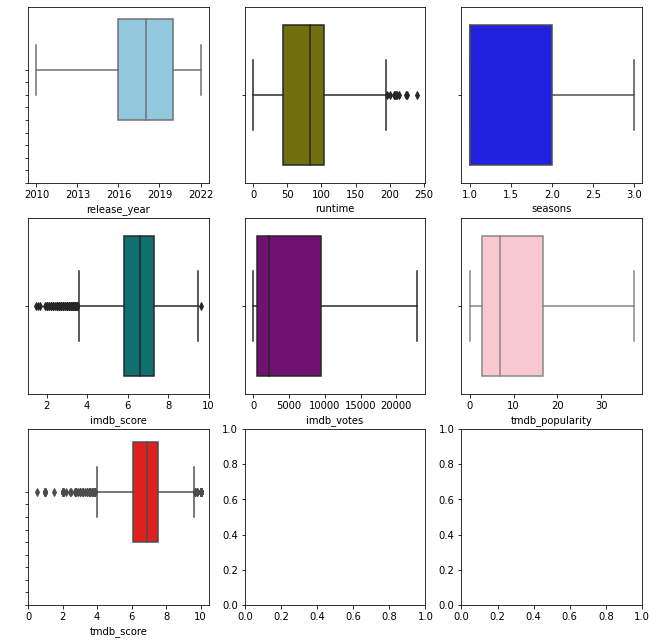

In [210]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.boxplot(data=Netflix_Data, x="release_year", color="skyblue", showfliers = False, ax=axs[0, 0])
p1.axes.set(xlabel='release_year', ylabel=' ')
p1.set_xticks( range(  2010 , 2024, 3) )
p1.set_yticks( np.arange(0, 1, 0.1) )

p2 = sns.boxplot(data=Netflix_Data, x="runtime",  color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')

p3 = sns.boxplot(data=Netflix_Data, x="seasons", color="blue", showfliers = False, ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')

p4 = sns.boxplot(data=Netflix_Data, x="imdb_score", color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')


p5 = sns.boxplot(data=Netflix_Data, x="imdb_votes", color="purple", showfliers = False , ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')

p6 = sns.boxplot(data=Netflix_Data, x="tmdb_popularity", color="pink", showfliers = False, ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')

p7 = sns.boxplot(data=Netflix_Data, x="tmdb_score", color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
p7.set_xticks( range(int(Netflix_Data['tmdb_score'].min()) , int(Netflix_Data['tmdb_score'].max()+1) , 2) )
p7.set_yticks( np.arange(0, 1, 0.1)  )

plt.show()

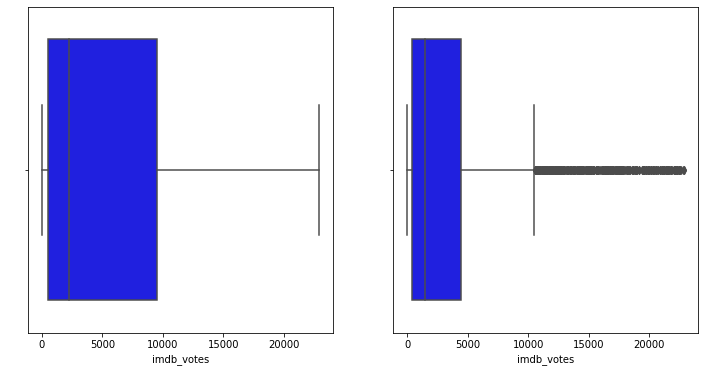

In [190]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

p1 = sns.boxplot(data=Netflix_Data, x="imdb_votes", color="blue", showfliers = False, ax=axs[0])
p1.axes.set(xlabel='imdb_votes', ylabel=' ')

p2 = sns.boxplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'imdb_votes')) , x="imdb_votes", color="blue", ax=axs[1])
p2.axes.set(xlabel='imdb_votes', ylabel=' ')

plt.show()